In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\\Python\\ML_PROJECTS\\Machine_Learning_Projects\\Risk_Assessment\\credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [6]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [7]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [8]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [9]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

# EDA

In [10]:
df_num=df.select_dtypes(include='number')

<AxesSubplot:>

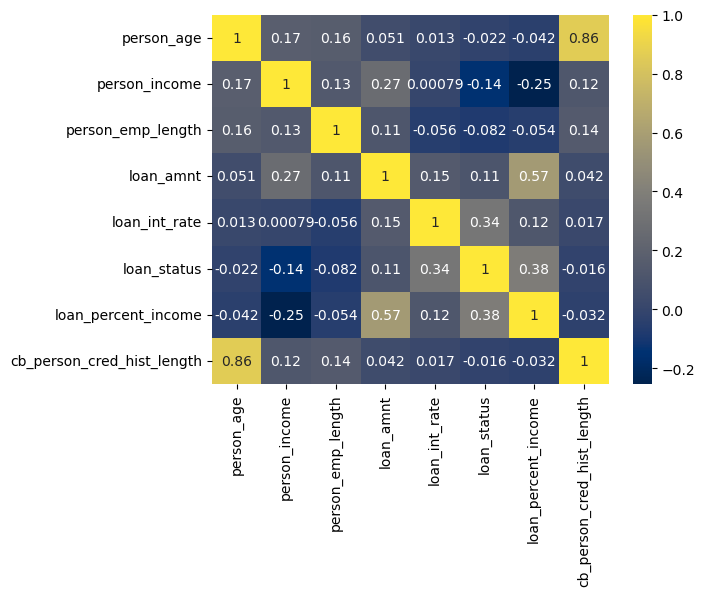

In [11]:
sns.heatmap(df_num.corr(), cmap = 'cividis', annot= True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 4000x4000 with 0 Axes>

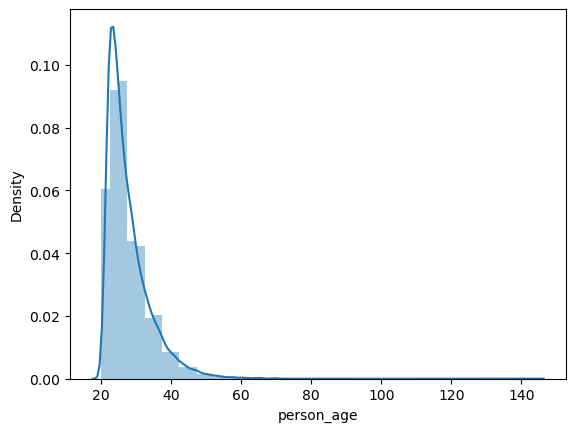

<Figure size 4000x4000 with 0 Axes>

In [51]:
sns.distplot(df['person_age'])
plt.figure(figsize=(40,40))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_emp_length', ylabel='Density'>

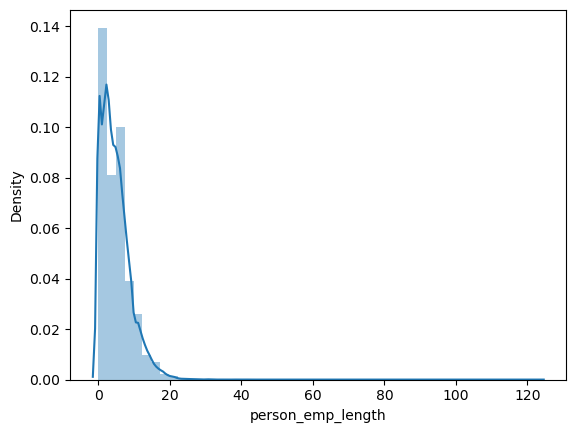

In [12]:
sns.distplot(df['person_emp_length'])

When dealing with a right-skewed column in a DataFrame where the mean is greater than the median, filling missing values with the mean might not be the best approach as it could further skew the distribution.

In [ ]:
median_value=df['person_emp_length'].median()
df['person_emp_length'].fillna(median_value,inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='person_emp_length', ylabel='Density'>

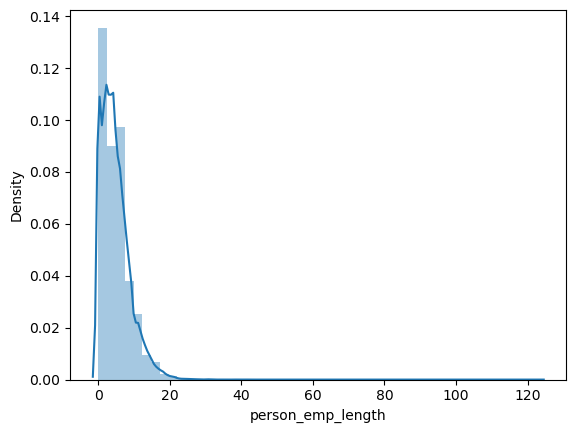

In [16]:
sns.distplot(df['person_emp_length'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

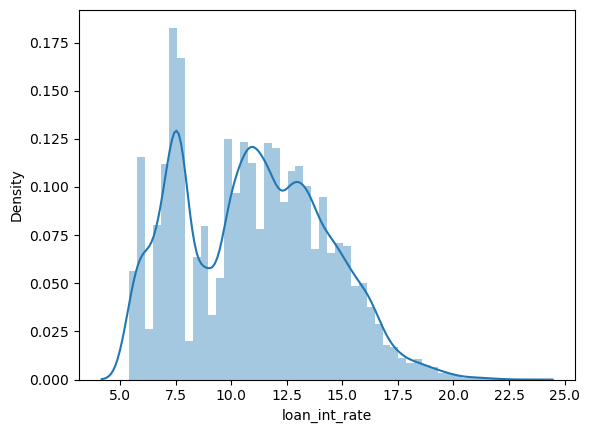

In [18]:
sns.distplot(df['loan_int_rate'])

Filling missing values for columns that exhibit a multimodal distribution with many local minima and peaks can be challenging, as simply using summary statistics like mean or median may not adequately capture the complexity of the distribution. 

# Interpolation:
Use interpolation techniques to estimate missing values based on the neighboring data points. This can be particularly useful if the distribution exhibits smooth transitions between modes.

In [20]:
df['loan_int_rate'].interpolate(method='linear', inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

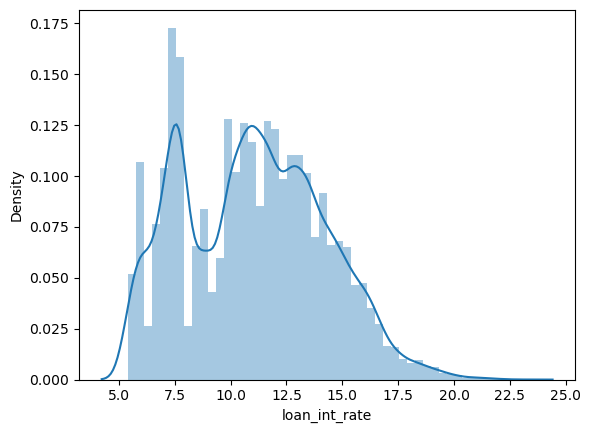

In [21]:
sns.distplot(df['loan_int_rate'])

# Encoding Categorical values

# Label Encoding:
When to Use:
Ordinal Categorical Variables: Use label encoding when dealing with ordinal categorical variables, where there is a natural order or ranking among the categories.
Reduced Dimensionality: When the number of unique categories is large and one-hot encoding would result in a high-dimensional, sparse representation. 
Example:
Encoding categorical variables like "education level" (low, medium, high)

hence applying this to loan_grade and cb_person_default_on_file

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['loan_grade']=le.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])

In [27]:
df['cb_person_default_on_file'].value_counts()

0    26836
1     5745
Name: cb_person_default_on_file, dtype: int64

# One-Hot Encoding:
When to Use:
Nominal Categorical Variables: Use one-hot encoding when dealing with nominal categorical variables, where there is no inherent order or ranking among the categories.
Sparse Representation: When the number of unique categories is relatively small and the categorical variable has a low cardinality (few unique values).

Hence applying it for df['person_home_ownership']

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform( df[['person_home_ownership']])

In [30]:
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['person_home_ownership']))

In [37]:
encoded_df=encoded_df.astype(int)
encoded_df
final_df = pd.concat([df, encoded_df], axis=1)
final_df.drop('person_home_ownership',axis=1,inplace=True)
final_df.head()

,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,PERSONAL,3,35000,16.02,1,0.59,1,3,0,0,0,1
1,21,9600,5.0,EDUCATION,1,1000,11.14,0,0.10,0,2,0,0,1,0
2,25,9600,1.0,MEDICAL,2,5500,12.87,1,0.57,0,3,1,0,0,0
3,23,65500,4.0,MEDICAL,2,35000,15.23,1,0.53,0,2,0,0,0,1
4,24,54400,8.0,MEDICAL,2,35000,14.27,1,0.55,1,4,0,0,0,1


When dealing with a column containing a large number of categories (e.g., 1000 categories), the choice of encoding method becomes crucial for maintaining model performance and managing computational complexity. In this scenario, one-hot encoding may not be the most efficient approach due to the high-dimensional, sparse representation it creates. Label encoding, on the other hand, may not be appropriate if there is no inherent ordinal relationship among the categories.

In such cases, a more suitable approach is to use a combination of techniques or specialized encoding methods designed for high-cardinality categorical variables.

# Frequency or Count Encoding:
Method: Replace each category with its frequency or count of occurrences in the dataset.
Advantages: Preserves information about category frequencies without introducing high dimensionality.
Example: Replace each category with the count of occurrences in the column.

Hence aplying this to 'loan_intent'

In [38]:
final_df['loan_intent']=final_df['loan_intent'].map(final_df['loan_intent'].value_counts())
final_df


,person_age,person_income,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,5521,3,35000,16.02,1,0.59,1,3,0,0,0,1
1,21,9600,5.0,6453,1,1000,11.14,0,0.10,0,2,0,0,1,0
2,25,9600,1.0,6071,2,5500,12.87,1,0.57,0,3,1,0,0,0
3,23,65500,4.0,6071,2,35000,15.23,1,0.53,0,2,0,0,0,1
4,24,54400,8.0,6071,2,35000,14.27,1,0.55,1,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5521,2,5800,13.16,0,0.11,0,30,1,0,0,0
32577,54,120000,4.0,5521,0,17625,7.49,0,0.15,0,19,1,0,0,0
32578,65,76000,3.0,3605,1,35000,10.99,1,0.46,0,28,0,0,0,1
32579,56,150000,5.0,5521,1,15000,11.48,0,0.10,0,26,1,0,0,0


# Train_test_split

In [58]:
x=final_df.drop(['loan_status'],axis=1).values
y=final_df['loan_status'].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
Feature scaling, including normalization and standardization, is crucial for many machine learning algorithms to ensure that all features contribute equally to the model's performance. Here's when to apply each method, along with code examples:

Normalization:
When to Apply:
When the features have different scales and you want to scale them to a similar range (typically [0, 1]).
When the distribution of the features does not follow a normal distribution, and the algorithm being used (e.g., k-nearest neighbors, neural networks with sigmoid or softmax activation functions) requires input features to be on a similar scale.

Standardization:
When to Apply:
When the features have different means and standard deviations.
When the distribution of the features is approximately normal or does not follow a normal distribution, and the algorithm being used (e.g., linear regression, logistic regression, support vector machines) assumes that features are normally distributed.

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

1. Fit-Transform on Training Data (X_train):
Fitting:
The fit_transform method is used on the training data to calculate the parameters (e.g., mean, standard deviation for standardization) needed to perform the transformation (scaling) on the data.
When fitting, the scaler learns the parameters from the training data, such as the minimum and maximum values for normalization or the mean and standard deviation for standardization.
Transforming:
After fitting, the learned parameters are applied to transform (scale) the training data.
This ensures that the training data is scaled consistently based on its own distribution.
2. Transform Only on Test Data (X_test):
Transforming:
For the test data, we only want to apply the transformation (scaling) using the parameters learned from the training data.
We do not fit the scaler to the test data because doing so would introduce data leakage, where information from the test set influences the model training process, leading to overfitting.
Preventing Data Leakage:
Applying the transformation learned from the training data ensures that the test data is scaled in the same way as the training data, maintaining consistency.
It ensures that the model is evaluated on unseen data, as it would be in a real-world scenario.
Example:
python

# Model Training

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=150)

In [64]:
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150)

In [65]:
y_pred=classifier.predict(X_test)

# Model Evaluation

In [74]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred),'\n')
print('Classification report \n',classification_report(y_test,y_pred),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy =  0.9289550406628817 

Classification report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.95      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517
 

[[5016   56]
 [ 407 1038]]


Lets try some other models and find the accuracy

# XGBoost

In [75]:
from xgboost import XGBClassifier
classifier2=XGBClassifier()
classifier2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
y_pred=classifier2.predict(X_test)

In [77]:
print('Accuracy = ',accuracy_score(y_test,y_pred),'\n')
print('Classification report \n',classification_report(y_test,y_pred),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy =  0.9349393892895504 

Classification report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.84      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.87      0.90      6517
weighted avg       0.94      0.93      0.93      6517
 

[[5020   52]
 [ 372 1073]]


# Logistics regression

In [79]:
from sklearn.linear_model import LogisticRegression
classifier3=LogisticRegression(random_state=0)
classifier3.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [80]:
y_pred=classifier3.predict(X_test)

In [81]:
print('Accuracy = ',accuracy_score(y_test,y_pred),'\n')
print('Classification report \n',classification_report(y_test,y_pred),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy =  0.8444069357066135 

Classification report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.90      5072
           1       0.72      0.48      0.58      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.71      0.74      6517
weighted avg       0.83      0.84      0.83      6517
 

[[4808  264]
 [ 750  695]]


# Support vector Classifier

In [83]:
from sklearn.svm import SVC
classifier4=SVC(kernel='linear',random_state=0)
classifier4.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [84]:
y_pred=classifier4.predict(X_test)

In [85]:
print('Accuracy = ',accuracy_score(y_test,y_pred),'\n')
print('Classification report \n',classification_report(y_test,y_pred),'\n')
print(confusion_matrix(y_test,y_pred))

Accuracy =  0.8424121528310572 

Classification report 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.74      0.45      0.56      1445

    accuracy                           0.84      6517
   macro avg       0.80      0.70      0.73      6517
weighted avg       0.83      0.84      0.83      6517
 

[[4838  234]
 [ 793  652]]


# XGboost has the best accuracy=  0.9349393892895504 